# **Deepfake detection model**

## **mounting drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir -p ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
 99% 3.72G/3.75G [00:26<00:00, 161MB/s]
100% 3.75G/3.75G [00:26<00:00, 149MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/140k-real-and-fake-faces.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## **Imports**

In [ ]:
from keras.applications import InceptionV3
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import InceptionResNetV2
from keras.applications import DenseNet201
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from keras import Sequential



## **Data Augmentation**

In [ ]:
# input_shape = (256,256, 3)
# num_classes = 2
learning_rate = 0.0001
batch_size = 128


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,  # Reduce rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1,
    fill_mode='nearest'  # Add fill mode to handle newly created pixels
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/train',
    target_size=(299, 299),  # Change target_size to (299, 299)
    batch_size=batch_size,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


test_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_generator = test_datagen.flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/valid',
    target_size=(299, 299),  # Change target_size to (299, 299)
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [ ]:
conv_base = InceptionV3(weights='imagenet', include_top = False , input_shape=(299, 299, 3))
classifier=Sequential()
classifier.add(conv_base)
classifier.add(Flatten())
classifier.add(Dense(512, activation='relu',kernel_regularizer=l2(0.0001)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

classifier.add(Dense(1, activation='sigmoid'))
conv_base.trainable=True
optimizer = Adam(learning_rate=0.0001)

classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_history=classifier.fit(train_generator,epochs=2,validation_data=validation_generator)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 2277s 3s/step - accuracy: 0.9014 - loss: 0.3574 - val_accuracy: 0.9643 - val_loss: 0.1797
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 2148s 3s/step - accuracy: 0.9897 - loss: 0.1067 - val_accuracy: 0.9949 - val_loss: 0.0760


In [ ]:
from tensorflow.keras.models import load_model
import os

In [ ]:
classifier.save(os.path.join('/content/drive/MyDrive/','model.h5'))

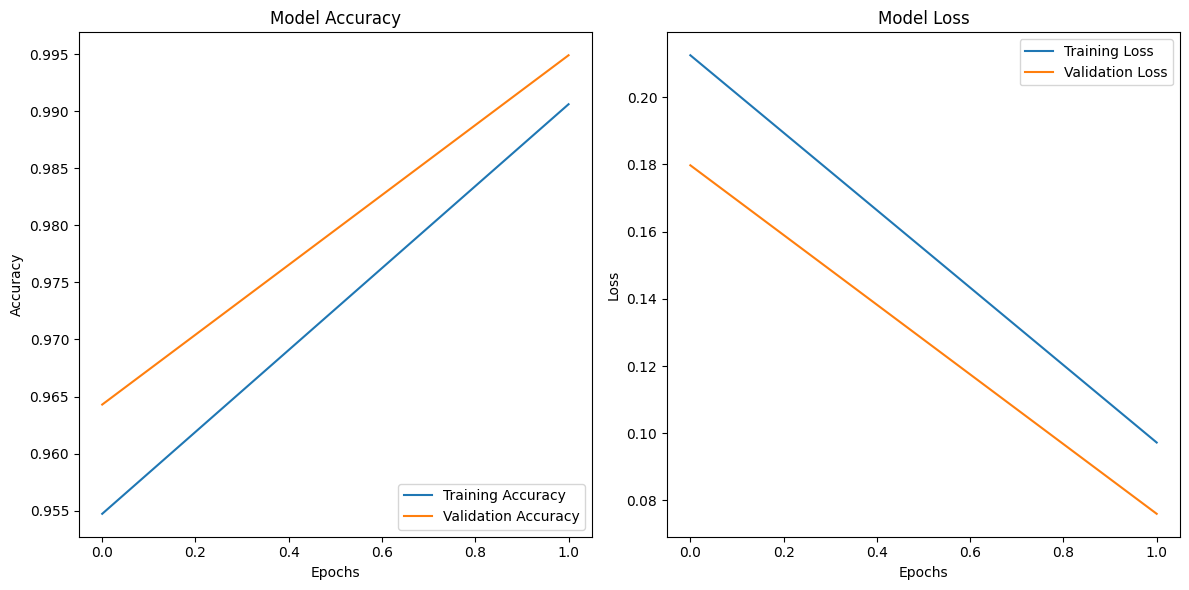

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model training
history = model_history  # Replace with the variable that holds the training history

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


<ipython-input-20-b6f83df9f212>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_index = int(prediction[0] > 0.5)  # Binary classification: 0 = Real, 1 = Fake
<ipython-input-20-b6f83df9f212>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_percentage = round(float(prediction[0]) * 100, 2) if predicted_class_index == 1 else round((1 - float(prediction[0])) * 100, 2)


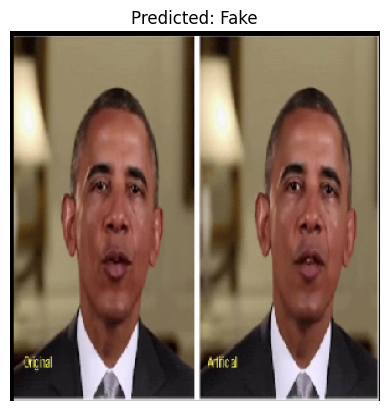

Predicted class: Fake
Predicted probability (in %): 100.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Labels for the deepfake model
labels = ['Real', 'Fake']

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Match model input size
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

def predict_and_display(img_path):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = classifier.predict(img_array)
    predicted_class_index = int(prediction[0] > 0.5)  # Binary classification: 0 = Real, 1 = Fake
    predicted_label = labels[predicted_class_index]
    prediction_percentage = round(float(prediction[0]) * 100, 2) if predicted_class_index == 1 else round((1 - float(prediction[0])) * 100, 2)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    print(f"Predicted class: {predicted_label}")
    print(f"Predicted probability (in %): {prediction_percentage}%")

# Example usage
image_path = '/content/deepfake.jpg'  # Adjust to your image path
predict_and_display(image_path)
